In [1]:
# 사용할 모듈 불러오기 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
# 패키지 임포트
import os 
import numpy as np 
import pandas as pd
from pandas import to_datetime
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

%matplotlib inline

# ARIMA 모델 패키지
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Auto Arima 모델 패키지
# pip install --user pmdarima
import pmdarima as pm
from pmdarima.model_selection import train_test_split

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (/opt/homebrew/lib/python3.9/site-packages/scipy/signal/signaltools.py)

In [ ]:
# 데이터 불러오기
items = pd.read_csv("./data/items.csv")
shops = pd.read_csv("./data/shops.csv")
train = pd.read_csv("./data/sales_train.csv")
test = pd.read_csv("./data/test.csv")
item_categories = pd.read_csv('./data/item_categories.csv')

In [ ]:
# date 를 datetime 형으로 변환 
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y") 
train["date"]

In [ ]:
pivot_for_train = train.pivot_table(index = ['date_block_num'] , values=['item_cnt_day'],aggfunc='sum')
pivot_for_train

In [142]:
pivot_for_train['date_se'] = ['2013-01-01', '2013-02-01', '2013-03-01','2013-04-01','2013-05-01','2013-06-01','2013-07-01','2013-08-01','2013-09-01','2013-10-01','2013-11-01','2013-12-01',
                            '2014-01-01', '2014-02-01', '2014-03-01','2014-04-01','2014-05-01','2014-06-01','2014-07-01','2014-08-01','2014-09-01','2014-10-01','2014-11-01','2014-12-01',
                            '2015-01-01', '2015-02-01', '2015-03-01','2015-04-01','2015-05-01','2015-06-01','2015-07-01','2015-08-01','2015-09-01','2015-10-01']

In [143]:
pivot_for_train['date_se'] = pd.to_datetime(pivot_for_train['date_se'], infer_datetime_format=True)

In [144]:
pivot_for_train

,item_cnt_day,date_se
date_block_num,,
0,131479.0,2013-01-01
1,128090.0,2013-02-01
2,147142.0,2013-03-01
3,107190.0,2013-04-01
4,106970.0,2013-05-01
5,125381.0,2013-06-01
6,116966.0,2013-07-01
7,125291.0,2013-08-01
8,133332.0,2013-09-01


In [145]:
pivot_for_train = pivot_for_train.reset_index()
pivot_for_train

,date_block_num,item_cnt_day,date_se
0,0,131479.0,2013-01-01
1,1,128090.0,2013-02-01
2,2,147142.0,2013-03-01
3,3,107190.0,2013-04-01
4,4,106970.0,2013-05-01
5,5,125381.0,2013-06-01
6,6,116966.0,2013-07-01
7,7,125291.0,2013-08-01
8,8,133332.0,2013-09-01
9,9,127541.0,2013-10-01


In [146]:
del pivot_for_train['date_block_num']

In [147]:
pivot_for_train

,item_cnt_day,date_se
0,131479.0,2013-01-01
1,128090.0,2013-02-01
2,147142.0,2013-03-01
3,107190.0,2013-04-01
4,106970.0,2013-05-01
5,125381.0,2013-06-01
6,116966.0,2013-07-01
7,125291.0,2013-08-01
8,133332.0,2013-09-01
9,127541.0,2013-10-01


In [190]:
# train 데이터와 validation 데이터 나누기.
X_train = pivot_for_train[pivot_for_train['date_se'] < '2015-10-01']
X_valid = pivot_for_train[pivot_for_train['date_se'] >= '2015-10-01']

# 예측한 열만 필터링하기
nyc = X_train[['date_se', 'item_cnt_day']]
nyc_v = X_valid[['date_se', 'item_cnt_day']]

# 각 데이터의 사이즈 확인하기
print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train Shape (33, 2)
X_Valid Shape (1, 2)


In [191]:
# Date 를 dataframe의 인덱스로 만들어주기
nyc.set_index('date_se', inplace=True)
nyc_v.set_index('date_se', inplace=True)

In [192]:
# 4주간의 값을 예측할 것이므로 예측날짜들을 인덱스로 한 dataframe 만들기
index_4_weeks = pd.date_range(nyc.index[-1], freq='M', periods = 4, tz = None) 

# 확인해보기
index_4_weeks

DatetimeIndex(['2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'], dtype='datetime64[ns]', freq='M')

In [197]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(nyc, order=(1,1,2))
result = model.fit()

# 예측한 값들을 저장
fcast1 = result.forecast(4)[0]
fcast1 = pd.Series(fcast1, index=index_4_weeks)
fcast1 = fcast1.rename("Arima")

# 확인
fcast1

2015-09-30    75575.212861
2015-10-31    75575.212861
2015-11-30    75575.212861
2015-12-31    75575.212861
Freq: M, Name: Arima, dtype: float64

ValueError: Found input variables with inconsistent numbers of samples: [1, 4]

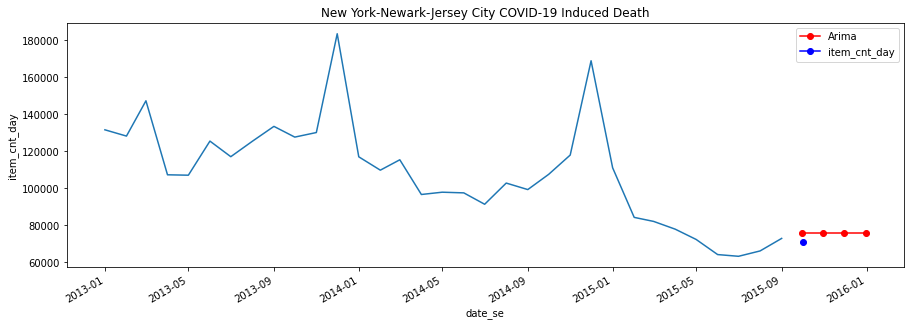

In [194]:
# 예측값 plot 하기
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='date_se', y='item_cnt_day', data = nyc)
chart.set_title('New York-Newark-Jersey City COVID-19 Induced Death')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
nyc_v.plot(ax=ax, color='blue', marker="o", legend=True)

# AIC 프린트하기
print('The MSE of ARIMA is:', mean_squared_error(nyc_v['item_cnt_day'].values, fcast1.values, squared=False))

DatetimeIndex(['2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31'], dtype='datetime64[ns]', freq='M')

In [200]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(nyc, order=(1,1,2))
result = model.fit()
result

In [201]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           item_cnt_day   No. Observations:                   33
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -365.855
Date:                Tue, 12 Jul 2022   AIC                            739.711
Time:                        22:51:11   BIC                            745.574
Sample:                    01-01-2013   HQIC                           741.654
                         - 09-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8341      0.259      3.218      0.001       0.326       1.342
ma.L1         -1.0888      0.398     -2.735      0.006      -1.869      -0.308
ma.L2          0.1034      0.233      0.445      0.657      -0.352       0.559
sigma2      5.493e+08   1.09e-09   5.05e+17      0.000    5.49e+08    5.49e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.48   Prob(JB):                         0.26
Heteroskedasticity (H):               0.97   Skew:                             0.37
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.98e+33. Standard errors may be unstable.
"""

In [1]:

# https://happy-chipmunk.tistory.com/entry/Time-Series-Forecasting-2-%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%98%88%EC%B8%A1-%EB%AA%A8%EB%8D%B8%EB%A7%81-ARIMA-Auto-regressive-integrated-moving-average-Auto-ARIMA